# Predicting Home Value
Due to our dataset find, our team has changed our scope from predicting home features to predicting home price using different statistical approaches. Together we will trial and error multiple algorithms and explore there utility in predicting home prices. Across these different algorithms we will use similar metrics such as MSE to determine the relative success of the model.

## Our Scope
A real estate investment firm has tasked our Group1 consulting team to develop a model to predict home prices based on a set of given parameters. Obviously we know location is the biggest idicator of home prices, but our team will use a combination of other home features to figure out the value of a home

## Our Data
We will be using the a publically availble dataset from Kaggle. The data contained in the set Austin, TX House Listings. It was scraped in January 2021 and is highly ranked on Kaggle for being clean and usable. Below is the link to the dataset.
https://www.kaggle.com/datasets/ericpierce/austinhousingprices?resource=download

# Familiarizing with Dataset

In [2]:
# import pandas for EDA
import pandas as pd

In [3]:
file_path = 'austinHousingData.csv'
df = pd.read_csv(file_path)
df.head(3)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

As you can see from the initial info() method, the dataset itself is very clean and usable. There isn't much data pre-processing needed in order to clean the data since there are no null values, and the majority of features are in a usable format.

### Dropping non-int and changing booleans
The only pre-processing we will need to do is to drop any d-type that is not an integer, like columns city, streetAddress, and description. We still have longitute and latitude so location is still within the dataset. Also we want to change the true and false values to 1's and 0's to make the entire dataset numerical.

In [5]:
#Droping the columns that are strings
col_drop_list = ['city', 'streetAddress', 'description']
df = df.drop(col_drop_list, axis=1)

df.shape

(15171, 44)

In [6]:
#Changing bool to int
col_bool_list = ['hasAssociation', 'hasCooling', 
                 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']

for col in col_bool_list:
    name = col + '_int'
    df[name] = df[col].astype(int)

df.shape

(15171, 50)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   zipcode                     15171 non-null  int64  
 2   latitude                    15171 non-null  float64
 3   longitude                   15171 non-null  float64
 4   propertyTaxRate             15171 non-null  float64
 5   garageSpaces                15171 non-null  int64  
 6   hasAssociation              15171 non-null  bool   
 7   hasCooling                  15171 non-null  bool   
 8   hasGarage                   15171 non-null  bool   
 9   hasHeating                  15171 non-null  bool   
 10  hasSpa                      15171 non-null  bool   
 11  hasView                     15171 non-null  bool   
 12  homeType                    15171 non-null  object 
 13  parkingSpaces               151

In [8]:
df.hasAssociation_int.value_counts()

1    8007
0    7164
Name: hasAssociation_int, dtype: int64

In [9]:
#Drop the bool columns
df = df.drop(col_bool_list, axis=1)
df.shape

(15171, 44)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   zipcode                     15171 non-null  int64  
 2   latitude                    15171 non-null  float64
 3   longitude                   15171 non-null  float64
 4   propertyTaxRate             15171 non-null  float64
 5   garageSpaces                15171 non-null  int64  
 6   homeType                    15171 non-null  object 
 7   parkingSpaces               15171 non-null  int64  
 8   yearBuilt                   15171 non-null  int64  
 9   latestPrice                 15171 non-null  int64  
 10  numPriceChanges             15171 non-null  int64  
 11  latest_saledate             15171 non-null  object 
 12  latest_salemonth            15171 non-null  int64  
 13  latest_saleyear             151

Now the data should be cleaned, all numeric, and ready to be used in the analysis.

## Analysis
In this model We will work with physics features of houses and the lastPrice, trying to find a model to predict the price using n number of bathrooms, bedrooms, stories and garage spaces, Size of land and size of living area.

In [ ]:
# Selecting phisic features from houses
independent: latestPrice 
dependent: garageSpaces, lotSizeSqFt, livingAreaSqFt, numOfBathrooms, numOfBedrooms, numOfStories

In [11]:
df_houses = df[['latestPrice', 'garageSpaces', 'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories']]
df_houses.head(3)

,latestPrice,garageSpaces,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories
0,305000,2,6011.0,2601,3.0,4,2
1,295000,2,6185.0,1768,2.0,4,1
2,256125,0,7840.0,1478,2.0,3,1


### Creating testing and training data
In this next step we will be creating the testing and training data for our algorithm. 

In [25]:
# Independent values
X = df[['garageSpaces', 'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories']]

# Dependent values
y = df['latestPrice']

In [26]:
# importing train_test_split to create testing and trainin data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Comparing size of X sets
print(X.shape, X_train.shape, X_test.shape)

(15171, 6) (12136, 6) (3035, 6)


### Linear regression with StatsModels

In [42]:
import statsmodels.api as sm

In [43]:
# Creating the model
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))

In [44]:
# Get model results
results = model.fit()

In [56]:
# Displey results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     972.4
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:16:53   Log-Likelihood:            -1.7266e+05
No. Observations:               12136   AIC:                         3.453e+05
Df Residuals:                   12129   BIC:                         3.454e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.464e+04   1.51e+04      5.

#### Coeffincient of determination is 0.32 that's not a good number, the better is close to 1
this model is explainin only the 32% of data

### Evaluation

In [51]:
# Get prediction with X_train using the model
y_train_pred = results.predict(sm.add_constant(X_train))
y_train_pred.shape

(12136,)

In [60]:
# RMSE
from sklearn.metrics import mean_squared_error
RMSE_train=mean_squared_error(y_train, y_train_pred, squared=False)
RMSE_train

365204.1086243755

Our model is off by about 365204 dollars in a given prediction

it's a bad number

In [62]:
# Get prediction with X_train using the model
y_test_pred = results.predict(sm.add_constant(X_test))

In [65]:
RMSE_test=mean_squared_error(y_test, y_test_pred, squared=False)
RMSE_test

405801.72456635174

In [67]:
# as long as the difference is small the model is consistent
diff = (RMSE_test - RMSE_train)/ RMSE_test *100
diff

10.004298524201621

## Correlations and checkin data

In [68]:
import numpy as np

In [70]:
df_houses.columns

Index(['latestPrice', 'garageSpaces', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories'],
      dtype='object')

In [71]:
np.corrcoef(df_houses['latestPrice'], df_houses['lotSizeSqFt'])

array([[1.        , 0.02093965],
       [0.02093965, 1.        ]])

In [72]:
np.corrcoef(df_houses['latestPrice'], df_houses['numOfBedrooms'])

array([[1.        , 0.29983879],
       [0.29983879, 1.        ]])

I don't see any reation, so I will plot data

### Plot

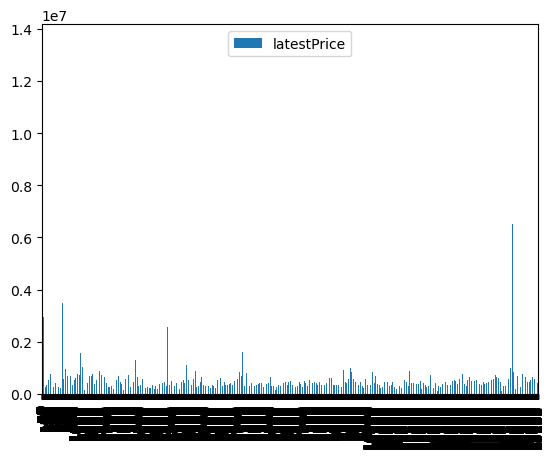

In [80]:
import matplotlib.pyplot as plt
df_houses[['latestPrice']].plot(kind='bar')
plt.show()

The data doenst have order, and there are outliers, so lets check in  a scatter

In [93]:
# Getting serires of number of houses
x_houses = len(df_houses[['latestPrice']])
x=range(x_houses)
len(x)

15171

In [90]:
# Setting prices in y
y=df_houses['latestPrice'].values
y.shape

(15171,)

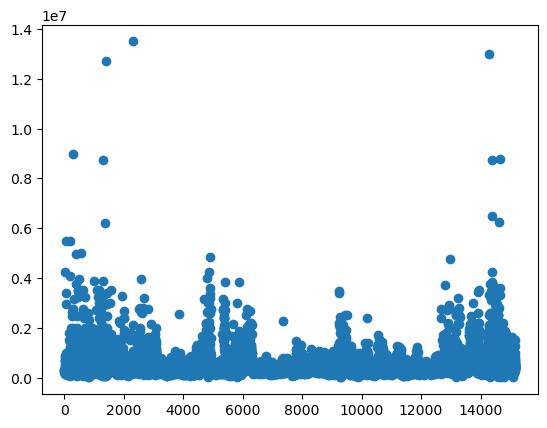

In [94]:
# Plotting data in scatter
plt.scatter(x, y)
plt.show()

I can see outliers

the data it's in disorder

In [102]:
# order prices
df_houses= df_houses.sort_values(by='latestPrice', ascending= False)
df_houses.head(10)

,latestPrice,garageSpaces,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories
14395,6499000,0,48787.2,7904,8.0,5,2
14627,6250000,4,37026.0,5775,7.0,5,1
1360,6200000,0,257004.0,11622,8.0,5,2
59,5495000,6,24829.2,8800,8.0,5,3
193,5474997,0,116305.2,7740,8.0,6,2
568,4995000,3,82764.0,6800,7.0,4,2
375,4950000,6,116740.8,13731,10.0,5,2
4882,4850000,7,454330.8,10011,6.0,5,2
12971,4745000,2,17859.6,6072,6.0,6,2
14387,4250000,0,71874.0,5740,5.0,6,2


In [98]:
print('mean', np.mean(df_houses['latestPrice']))
print('median', np.median(df_houses['latestPrice']))
print('std desv', np.std(df_houses['latestPrice']))

mean 512767.7437215741
median 405000.0
std desv 453170.3779714149


I will delete outliers above 7000000

In [107]:
# prices below 7 000 000
df_houses = df_houses[df_houses['latestPrice']<1000000]
df_houses = df_houses.sort_values(by='latestPrice', )

In [108]:
print('mean', np.mean(df_houses['latestPrice']))
print('median', np.median(df_houses['latestPrice']))
print('std desv', np.std(df_houses['latestPrice']))

mean 430656.25502883666
median 395000.0
std desv 180486.16751572138


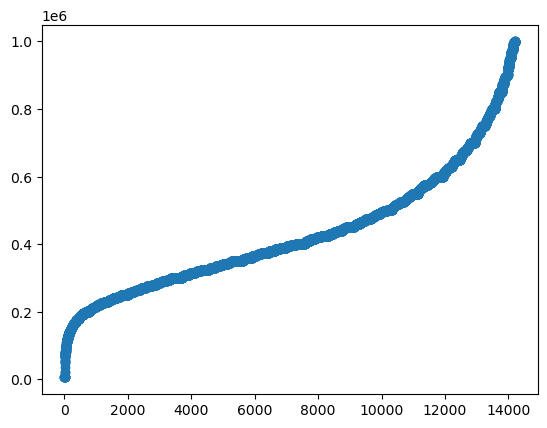

In [109]:
# plotting in scatter

# Getting serires of number of houses
x_houses = len(df_houses[['latestPrice']])
x=range(x_houses)
len(x)

# Setting prices in y
y=df_houses['latestPrice'].values
y.shape

# Plotting data in scatter
plt.scatter(x, y)
plt.show()